In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import glob

# Define the input and output directories
input_dir = '/home/ewershof/Repos/FibroblastMatrixModel/cellMatrixModel/migratory_trails/Text_trails/'

output_dir = '/home/ewershof/Repos/FibroblastMatrixModel/cellMatrixModel/migratory_trails/Images/'
# Parameters
distance_threshold = 200  # Threshold for distance to break the trail
dot_size = 2  # Dot size for each position
line_alpha = 0.1  # Transparency for the trail lines
time_frames = range(0, 2001, 400)  # Timeframes to plot

# Get list of all text files in input_dir
text_files = glob.glob(f'{input_dir}/*.txt')
text_files

['/home/ewershof/Repos/FibroblastMatrixModel/cellMatrixModel/migratory_trails/Text_trails/File__5-3-19_4069801017.txt',
 '/home/ewershof/Repos/FibroblastMatrixModel/cellMatrixModel/migratory_trails/Text_trails/File__5-3-19_3692279957.txt',
 '/home/ewershof/Repos/FibroblastMatrixModel/cellMatrixModel/migratory_trails/Text_trails/File__5-3-19_1361954881.txt',
 '/home/ewershof/Repos/FibroblastMatrixModel/cellMatrixModel/migratory_trails/Text_trails/File__5-3-19_2035624250.txt',
 '/home/ewershof/Repos/FibroblastMatrixModel/cellMatrixModel/migratory_trails/Text_trails/File__5-3-19_2764229099.txt']

In [2]:
# Loop over each file in the input directory
for file_path in text_files:
    # Extract file ID from the filename
    file_id = os.path.basename(file_path).replace('.txt', '')

    # Load the data
    data = pd.read_csv(file_path, sep='\t', header=None, names=['cell_id', 'time_frame', 'x', 'y', 'theta'])

    # Group the data by cell ID
    grouped = data.groupby('cell_id')

    # Plot for each specified timeframe
    for t in time_frames:
        plt.figure(figsize=(10, 10))
        plt.title(f'Migratory Trails - {file_id} - Timeframe {t}')
        plt.xlabel('X')
        plt.ylabel('Y')

        # Plot the trail of each cell up to the current timeframe
        for cell_id, group in grouped:
            # Get the subset of data up to the current timeframe for the current cell
            trail_data = group[group['time_frame'] <= t]

            # Iterate through the trail points, plotting segments where the distance is below the threshold
            x_coords = trail_data['x'].values
            y_coords = trail_data['y'].values
            
            # Plot each segment based on the distance threshold
            for i in range(1, len(x_coords)):
                x_prev, y_prev = x_coords[i - 1], y_coords[i - 1]
                x_curr, y_curr = x_coords[i], y_coords[i]
                distance = np.sqrt((x_curr - x_prev) ** 2 + (y_curr - y_prev) ** 2)
                
                # Only draw line if the distance is below the threshold
                if distance <= distance_threshold:
                    plt.plot([x_prev, x_curr], [y_prev, y_curr], color='k', linewidth=0.8, alpha=line_alpha)
            
            # Uncomment the following line if you want to show individual points as well
            # plt.scatter(x_coords, y_coords, s=dot_size, color='k', alpha=line_alpha)
        
        # Save the image with file ID and timeframe in the filename
        output_path = f'{output_dir}/trail_{file_id}_timeframe_{t}.png'
        plt.savefig(output_path)
        plt.close()

In [35]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Folder containing images and parameter files
folder_path = "/home/ewershof/Repos/FibroblastMatrixModel/cellMatrixModel/migratory_trails/Images/"

# Function to parse parameters from the parameter file
def parse_parameters(file_path):
    params = {}
    with open(file_path, 'r') as file:
        for line in file:
            if(len(line.split(' '))==2):
                key, value = line.split(' ')
                params[key] = value.strip()
    return params

# Function to generate subplot titles
def generate_title(timepoint, polarity, w2, w5):
    return f"t={timepoint}, polarity={polarity}, w2={w2}, w5={w5}"

# Get unique IDs from the filenames
unique_ids = {fname.split('_')[4] for fname in os.listdir(folder_path) if fname.endswith('.png')}
unique_ids = sorted(unique_ids)

In [38]:
images

['/home/ewershof/Repos/FibroblastMatrixModel/cellMatrixModel/migratory_trails/Images/trail_File__5-3-19_4069801017_timeframe_0.png',
 '/home/ewershof/Repos/FibroblastMatrixModel/cellMatrixModel/migratory_trails/Images/trail_File__5-3-19_4069801017_timeframe_1200.png',
 '/home/ewershof/Repos/FibroblastMatrixModel/cellMatrixModel/migratory_trails/Images/trail_File__5-3-19_4069801017_timeframe_1600.png',
 '/home/ewershof/Repos/FibroblastMatrixModel/cellMatrixModel/migratory_trails/Images/trail_File__5-3-19_4069801017_timeframe_2000.png',
 '/home/ewershof/Repos/FibroblastMatrixModel/cellMatrixModel/migratory_trails/Images/trail_File__5-3-19_4069801017_timeframe_400.png',
 '/home/ewershof/Repos/FibroblastMatrixModel/cellMatrixModel/migratory_trails/Images/trail_File__5-3-19_4069801017_timeframe_800.png']

In [39]:
sorted_files = sorted(images, key=lambda x: int(x.split('timeframe_')[1].split('.')[0]))

# Display sorted files
print(sorted_files)

['/home/ewershof/Repos/FibroblastMatrixModel/cellMatrixModel/migratory_trails/Images/trail_File__5-3-19_4069801017_timeframe_0.png', '/home/ewershof/Repos/FibroblastMatrixModel/cellMatrixModel/migratory_trails/Images/trail_File__5-3-19_4069801017_timeframe_400.png', '/home/ewershof/Repos/FibroblastMatrixModel/cellMatrixModel/migratory_trails/Images/trail_File__5-3-19_4069801017_timeframe_800.png', '/home/ewershof/Repos/FibroblastMatrixModel/cellMatrixModel/migratory_trails/Images/trail_File__5-3-19_4069801017_timeframe_1200.png', '/home/ewershof/Repos/FibroblastMatrixModel/cellMatrixModel/migratory_trails/Images/trail_File__5-3-19_4069801017_timeframe_1600.png', '/home/ewershof/Repos/FibroblastMatrixModel/cellMatrixModel/migratory_trails/Images/trail_File__5-3-19_4069801017_timeframe_2000.png']


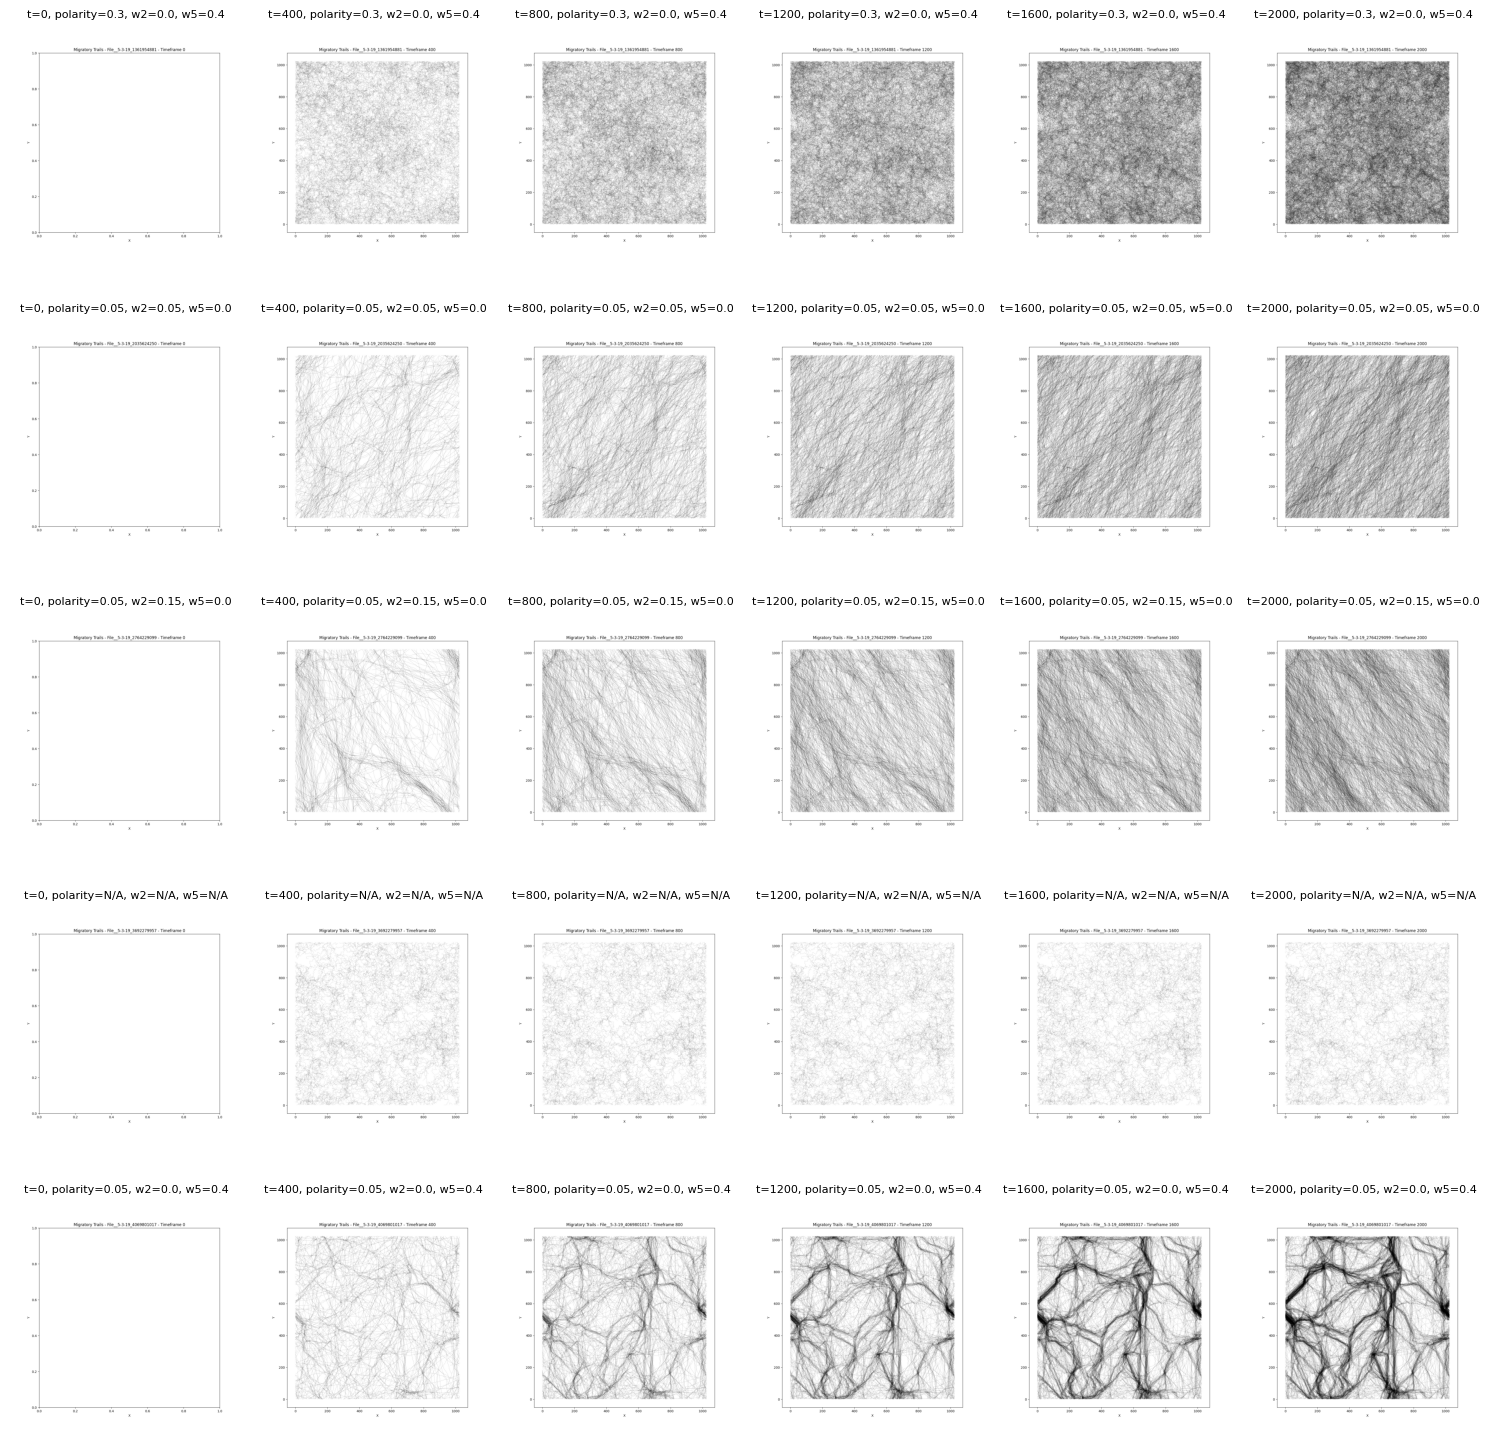

In [41]:
# Initialize plot
fig, axes = plt.subplots(5, 6, figsize=(15, 15))

# Iterate over each unique ID and timepoint
for row, unique_id in enumerate(unique_ids):
    # Get all images and parameter file for this ID
    # images = sorted([os.path.join(folder_path, f) for f in os.listdir(folder_path) if f"_File__{unique_id}" in f and f.endswith('.png')])
    images = sorted([os.path.join(folder_path, f) for f in os.listdir(folder_path) if unique_id in f and f.endswith('.png')])
    images = sorted_files = sorted(images, key=lambda x: int(x.split('timeframe_')[1].split('.')[0]))

    param_file_path = os.path.join(folder_path, f"{unique_id}_parametersToRead.txt")
    
    # Parse the parameters
    params = parse_parameters(param_file_path)
    polarity = params.get("polarity", "N/A")
    w2 = params.get("w2", "N/A")
    w5 = params.get("w5", "N/A")
    
    # Plot each timepoint for the current ID
    for col, image_path in enumerate(images):
        # Extract the timepoint from the filename
        timepoint = image_path.split('_')[-1].split('.')[0]
        
        # Load and display the image
        img = Image.open(image_path)
        axes[row, col].imshow(img)
        
        # Set the subplot title with extracted parameters
        title = generate_title(timepoint, polarity, w2, w5)
        axes[row, col].set_title(title, fontsize=8)
        
        # Remove axes for cleaner look
        axes[row, col].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
# Save the figure as a high-resolution PNG
plt.savefig("/home/ewershof/Repos/FibroblastMatrixModel/cellMatrixModel/migratory_trails/output_plot.png", dpi=300)  # Save with 300 DPI for high resolution
plt.show()